# Imports

In [1]:
# Torch
import torch

# Utils

from src.algos.trpo import (
    get_exp_envs,
    plot_rewards_and_actions,
    train_policy,
    create_probabilistic_policy,
    create_critic,
    sample_data,
    create_replay_buffer,
    create_loss_module,
    GeneralLogger,
    TrustRegion
)

# Create training and validation environments

In [4]:
data_path = 'data/naive_2_buildings_simple/'
reward = 'weighted_cost_emissions'
seed = 0
day_count = 1
personal_encoding = False
device = 'cpu'
# device = 'mps'
# device = 'cuda'
gpu_device_ix = 2

train_env, eval_env, device = get_exp_envs(
    data_path=data_path,
    reward=reward,
    seed=seed,
    day_count=day_count,
    device=device,
    gpu_device_ix=gpu_device_ix,
    personal_encoding=personal_encoding
)


# TRPO Training

In [7]:
# Sampling
days_per_iter = 500
frames_per_batch = days_per_iter * 24  # Number of team frames collected per training iteration
n_iters = 10  # Number of sampling and training iterations
total_frames = frames_per_batch * n_iters

# Training
days_per_batch = 500  # Number of days per training iteration
minibatch_size = days_per_batch * 24  # Size of the mini-batches in each optimization step
max_grad_norm = 1.0  # Maximum norm for the gradients
num_epochs_policy = 10  # Number of optimization steps per training iteration for policy
num_epochs_critic = 10  # Number of optimization steps per training iteration for the critic
lr = 1e-4  # Learning rate for the critic

# TRPO
gamma = 1  # discount factor
lmbda = 1  # lambda for generalised advantage estimation
entropy_eps = 1e-4  # coefficient of the entropy term in the PPO loss

# Networks configurations

share_parameters_policy = True
share_parameters_critic = True
multi_agent_ppo = True
group_features = True

# Create networks
policy = create_probabilistic_policy(
    train_env, share_parameters_policy=share_parameters_policy, device=device, group_features=group_features
)
critic = create_critic(
    train_env, share_parameters_critic=share_parameters_critic, mappo=multi_agent_ppo, device=device, group_features=group_features
)

# Create replay buffer
replay_buffer = create_replay_buffer(frames_per_batch, device, minibatch_size)

# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

# Confiure logger

logger = GeneralLogger()
logger.setup(
    config={
        "wdb_log": False,
        "csv_log": True,
        "console_log": False,
        "exp_config": {},
    }
)

# Train policy

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=n_iters,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 9, reward_mean: -0.7851654887199402, eval_reward_mean: -0.7979958653450012: 100%|██████████| 10/10 [24:40<00:00, 148.09s/it]


### Plot results

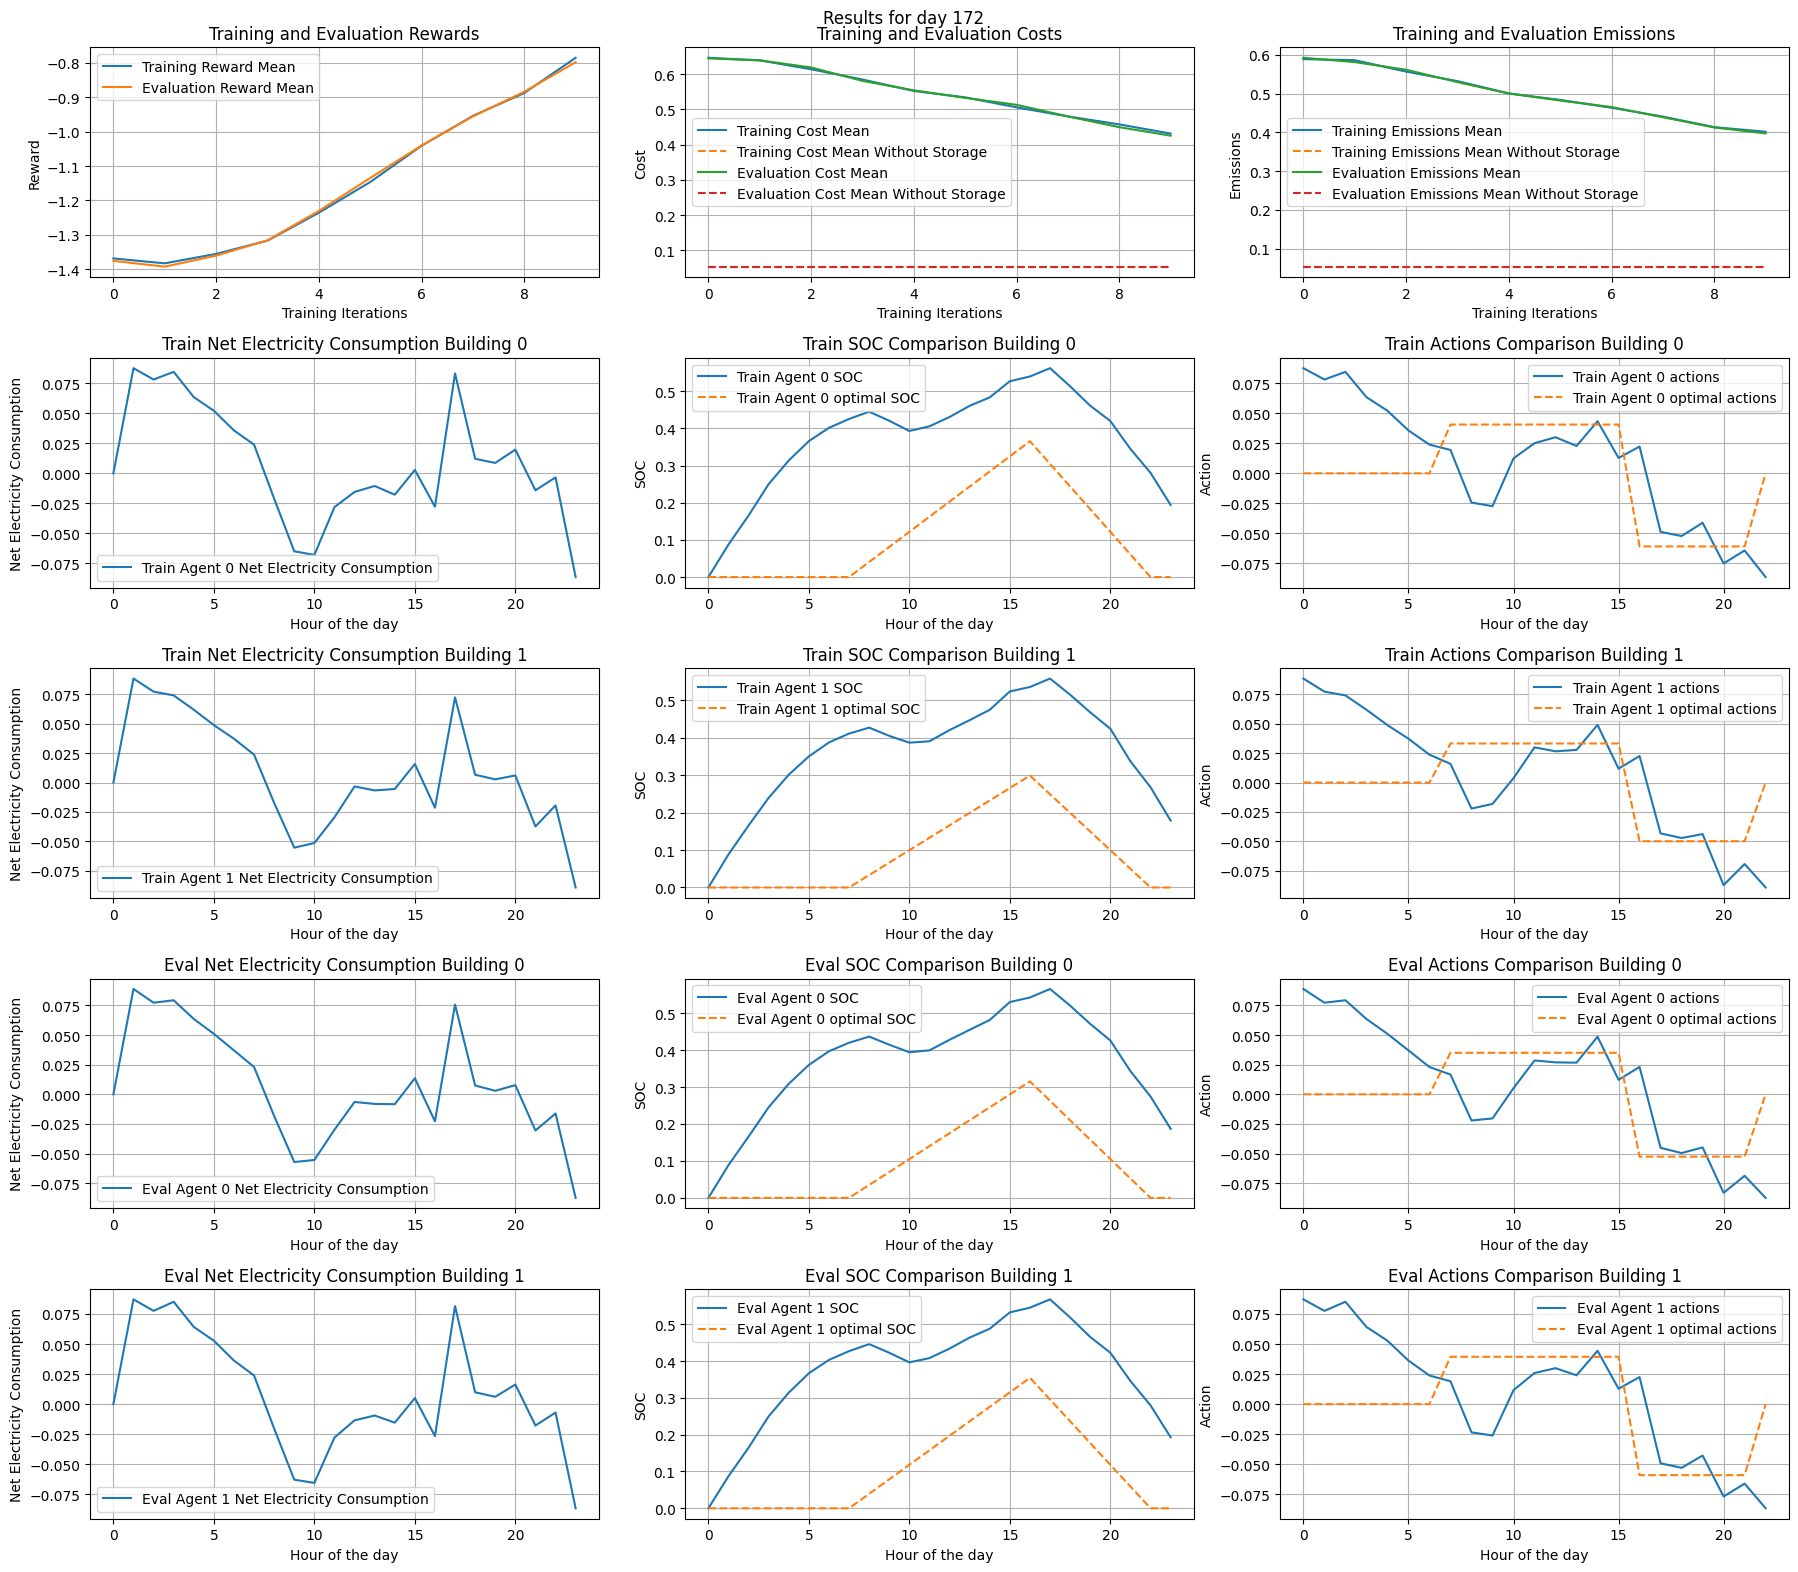

In [8]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [9]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=10,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 9, reward_mean: -0.3711560368537903, eval_reward_mean: -0.3774034380912781: 100%|██████████| 10/10 [23:08<00:00, 138.83s/it] 


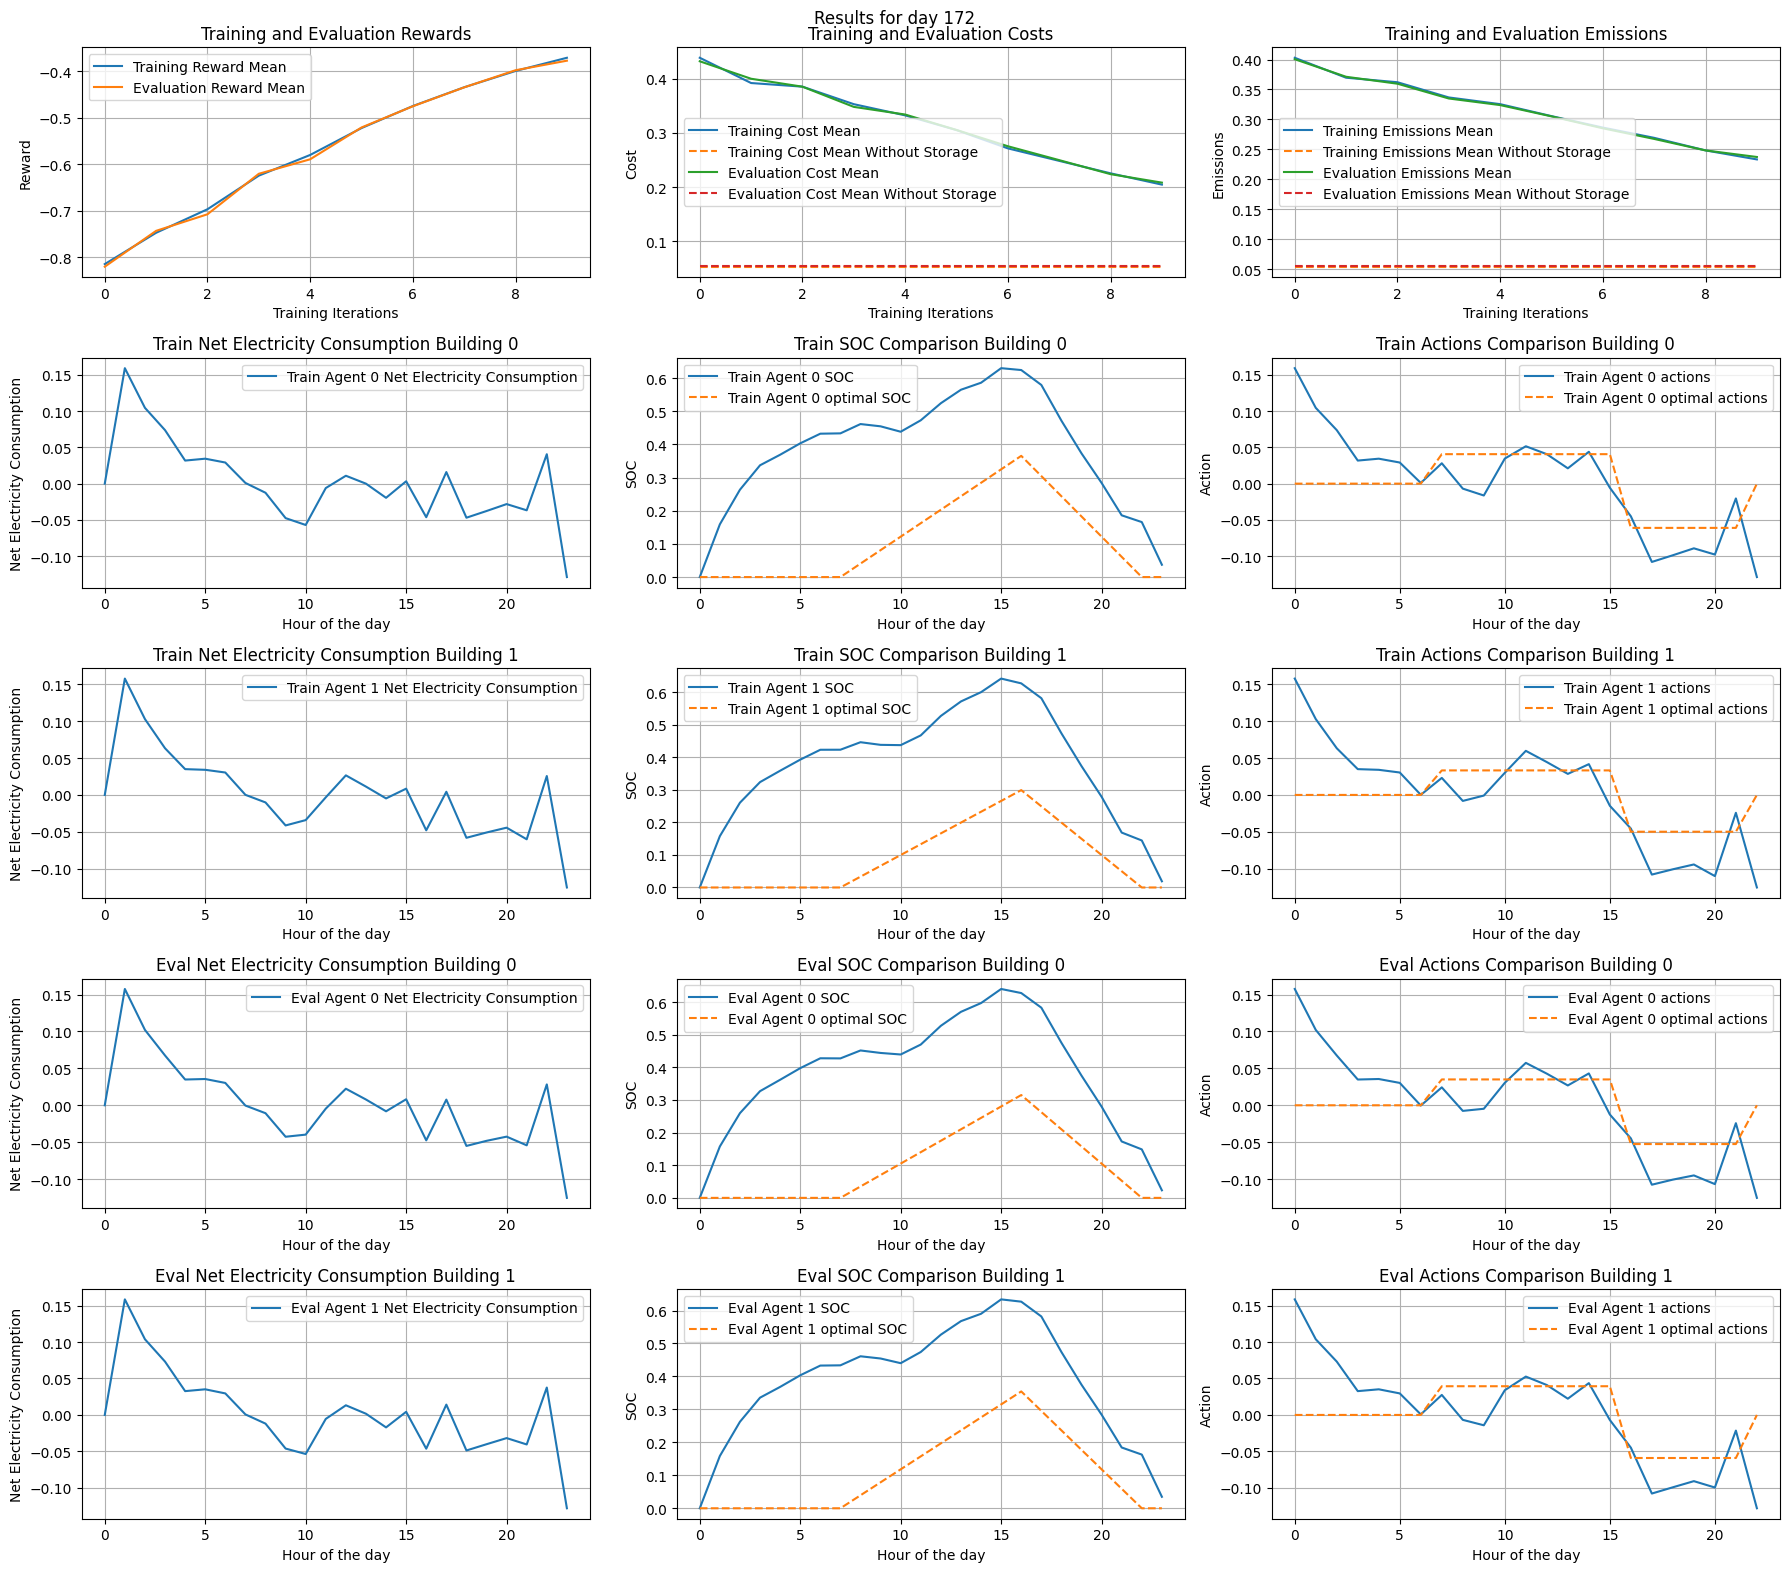

In [10]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [11]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=10,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 9, reward_mean: -0.2484474629163742, eval_reward_mean: -0.25015878677368164: 100%|██████████| 10/10 [20:29<00:00, 122.98s/it]


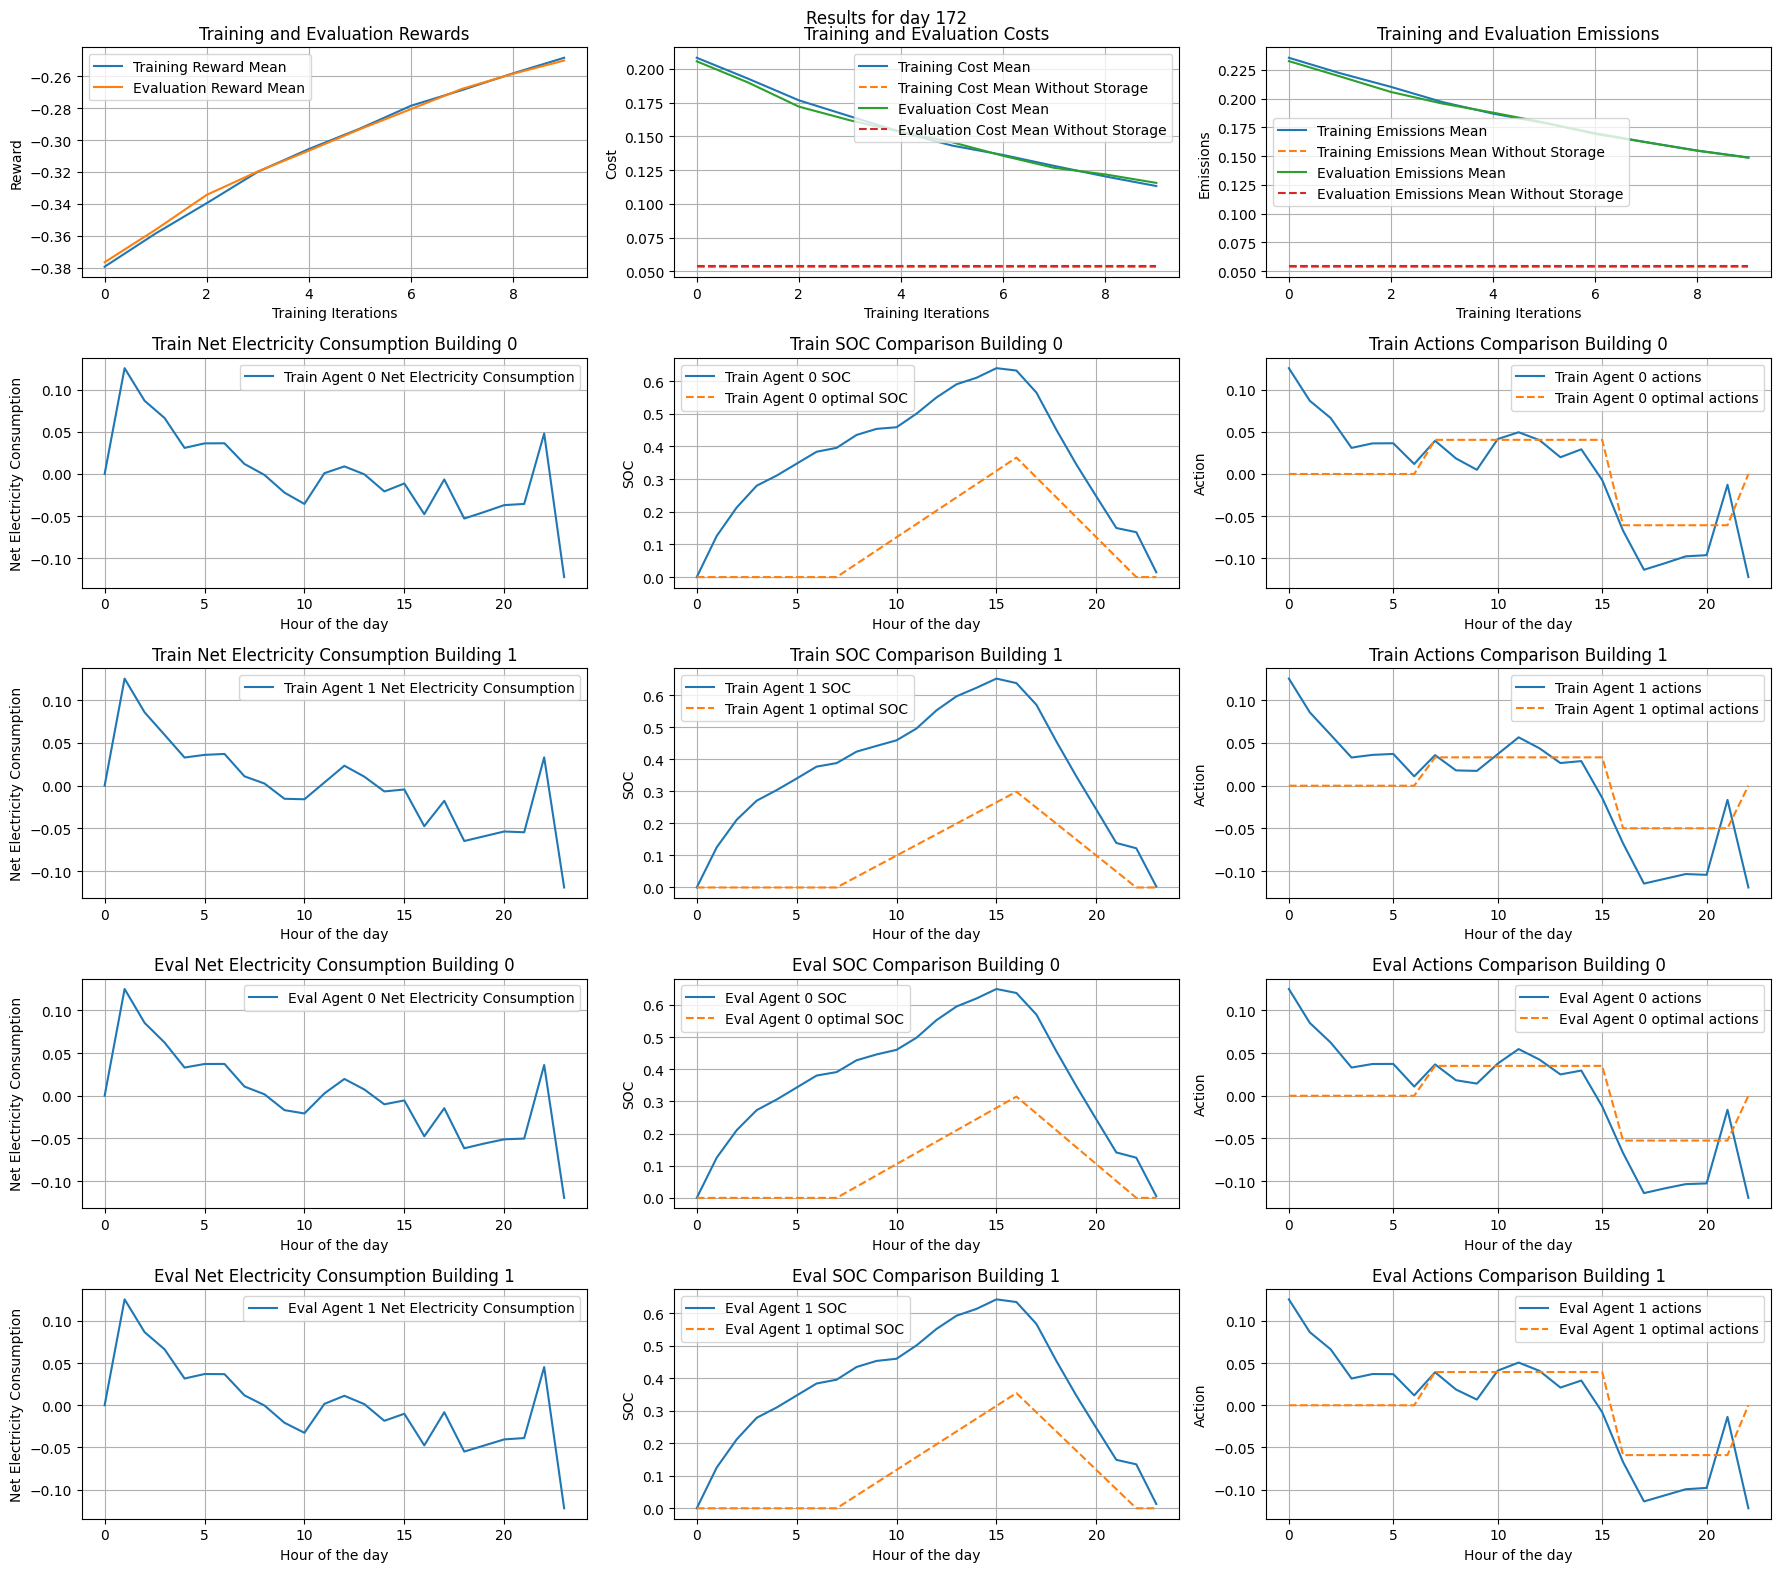

In [12]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [13]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=20,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 19, reward_mean: -0.16759228706359863, eval_reward_mean: -0.16767314076423645: 100%|██████████| 20/20 [43:17<00:00, 129.89s/it]


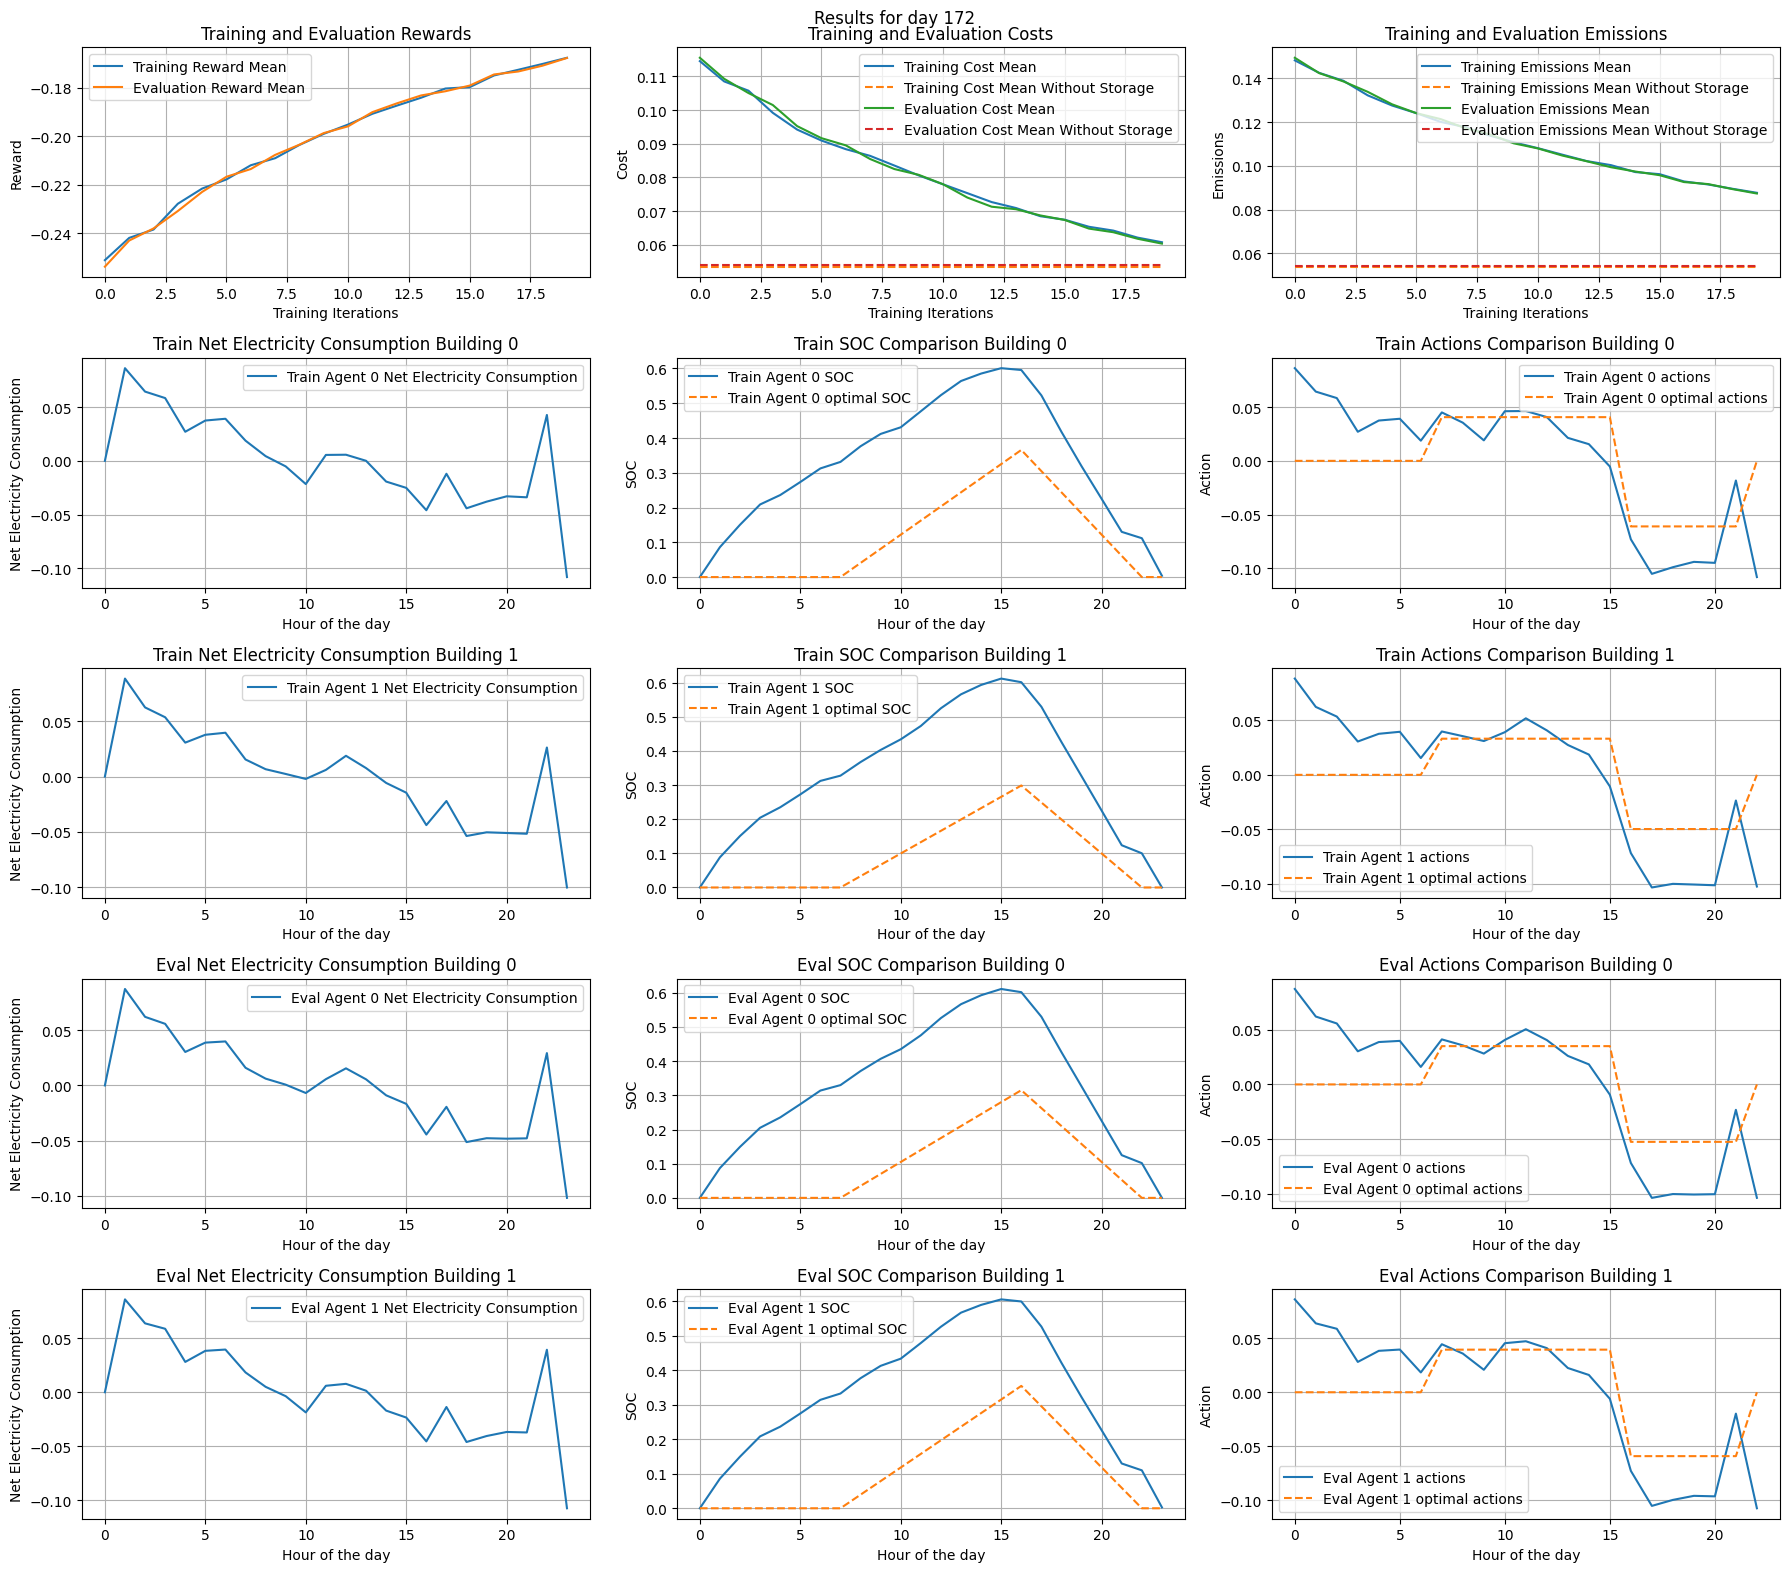

In [14]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [18]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=20,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 19, reward_mean: -0.12755092978477478, eval_reward_mean: -0.12746299803256989: 100%|██████████| 20/20 [49:50<00:00, 149.54s/it]


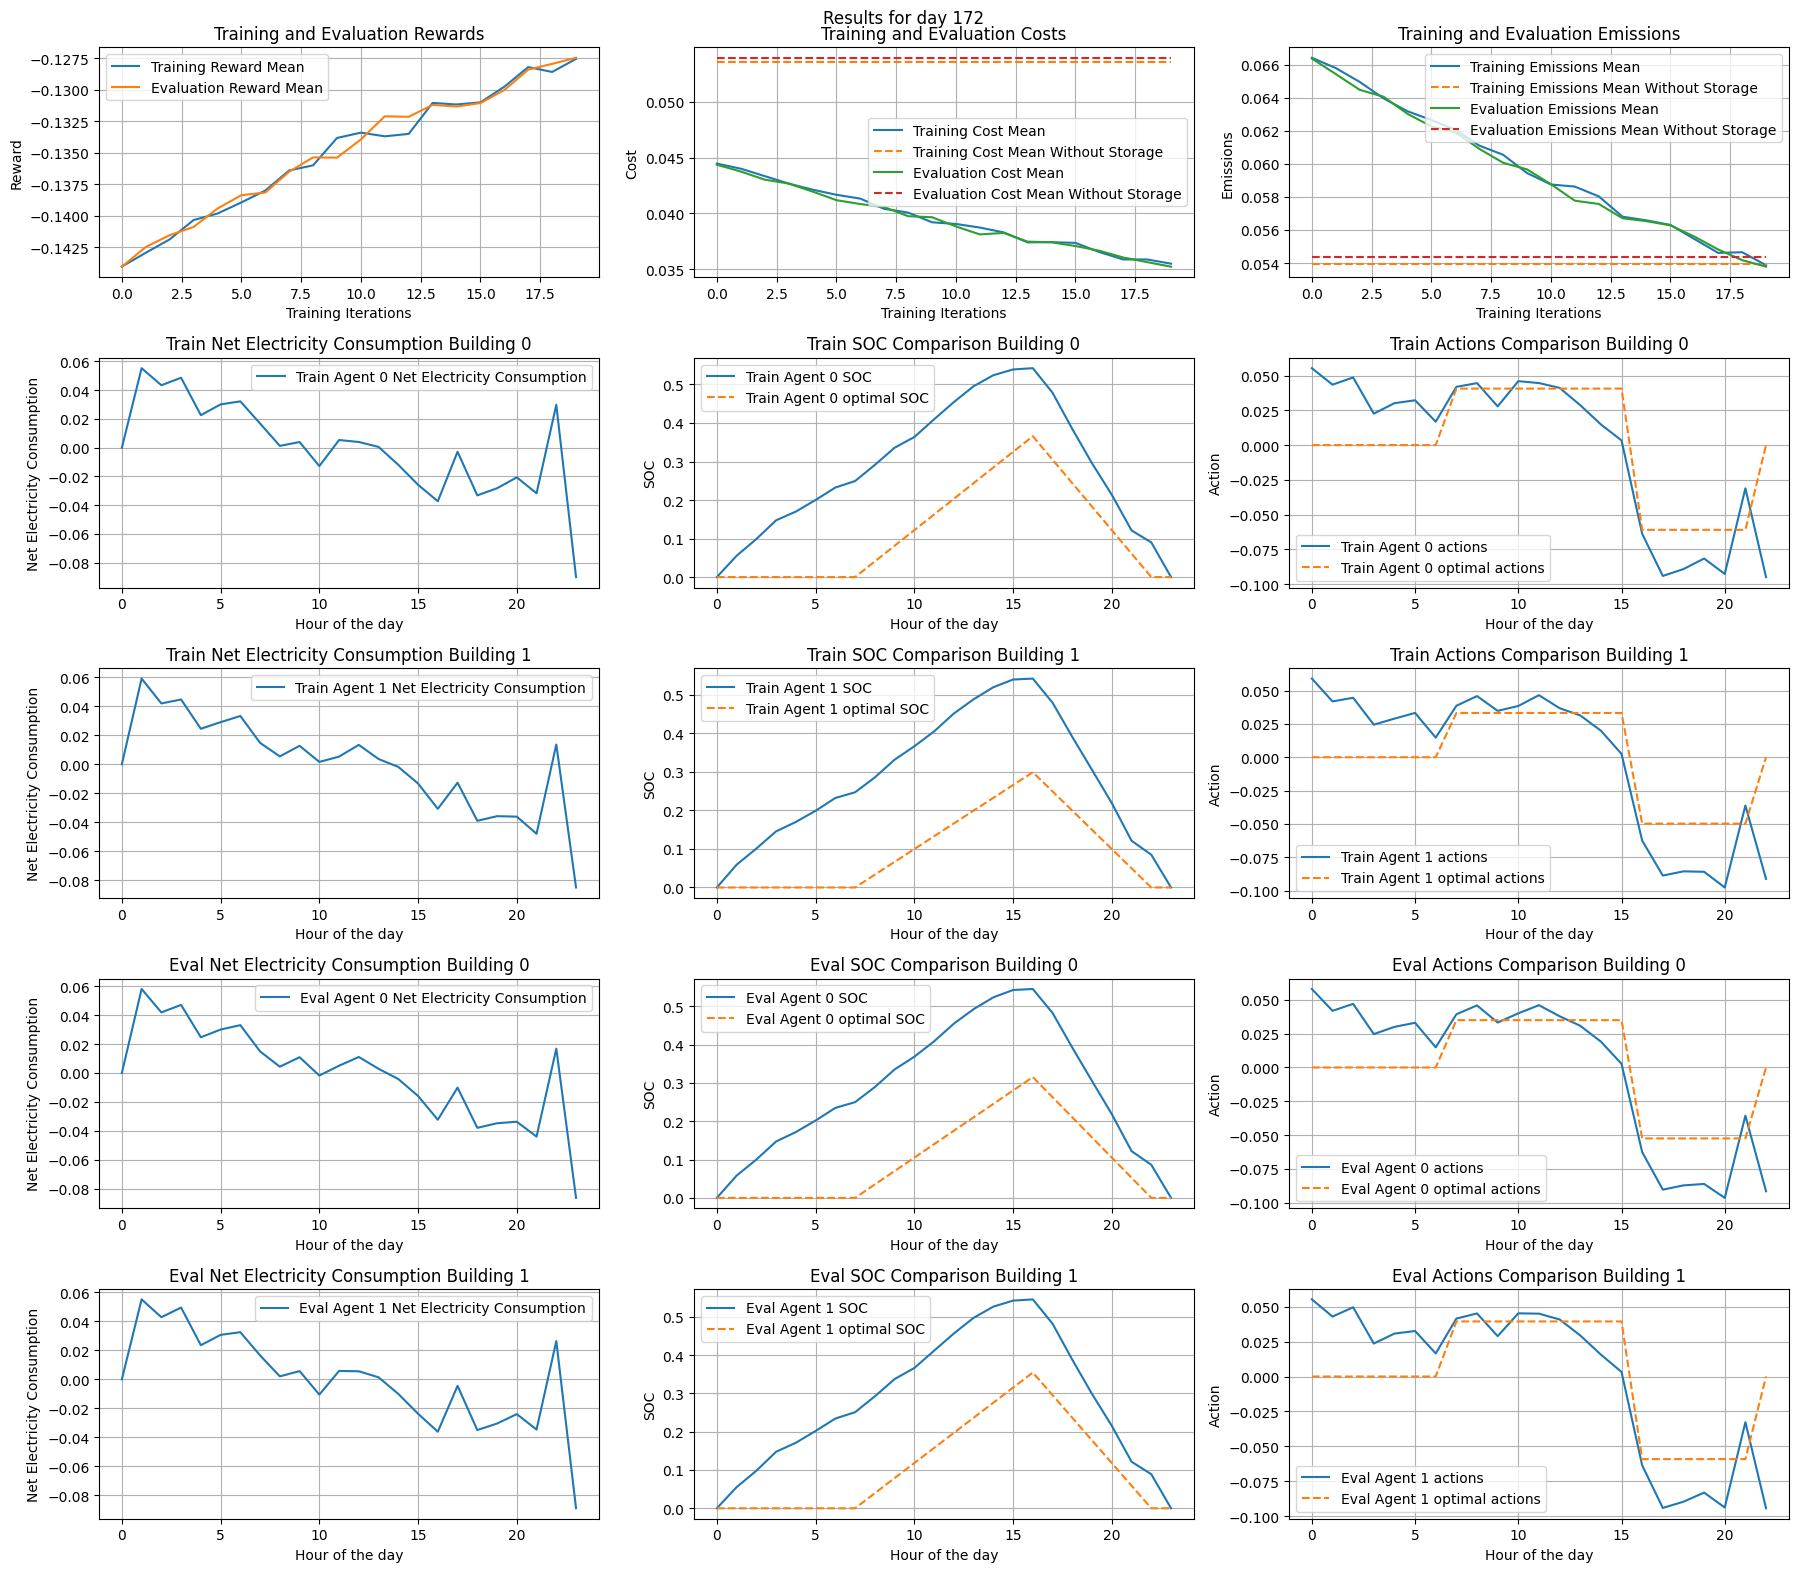

In [19]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [ ]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=20,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 10, reward_mean: -0.12263426184654236, eval_reward_mean: -0.1238841637969017:  55%|█████▌    | 11/20 [27:07<22:29, 150.00s/it]

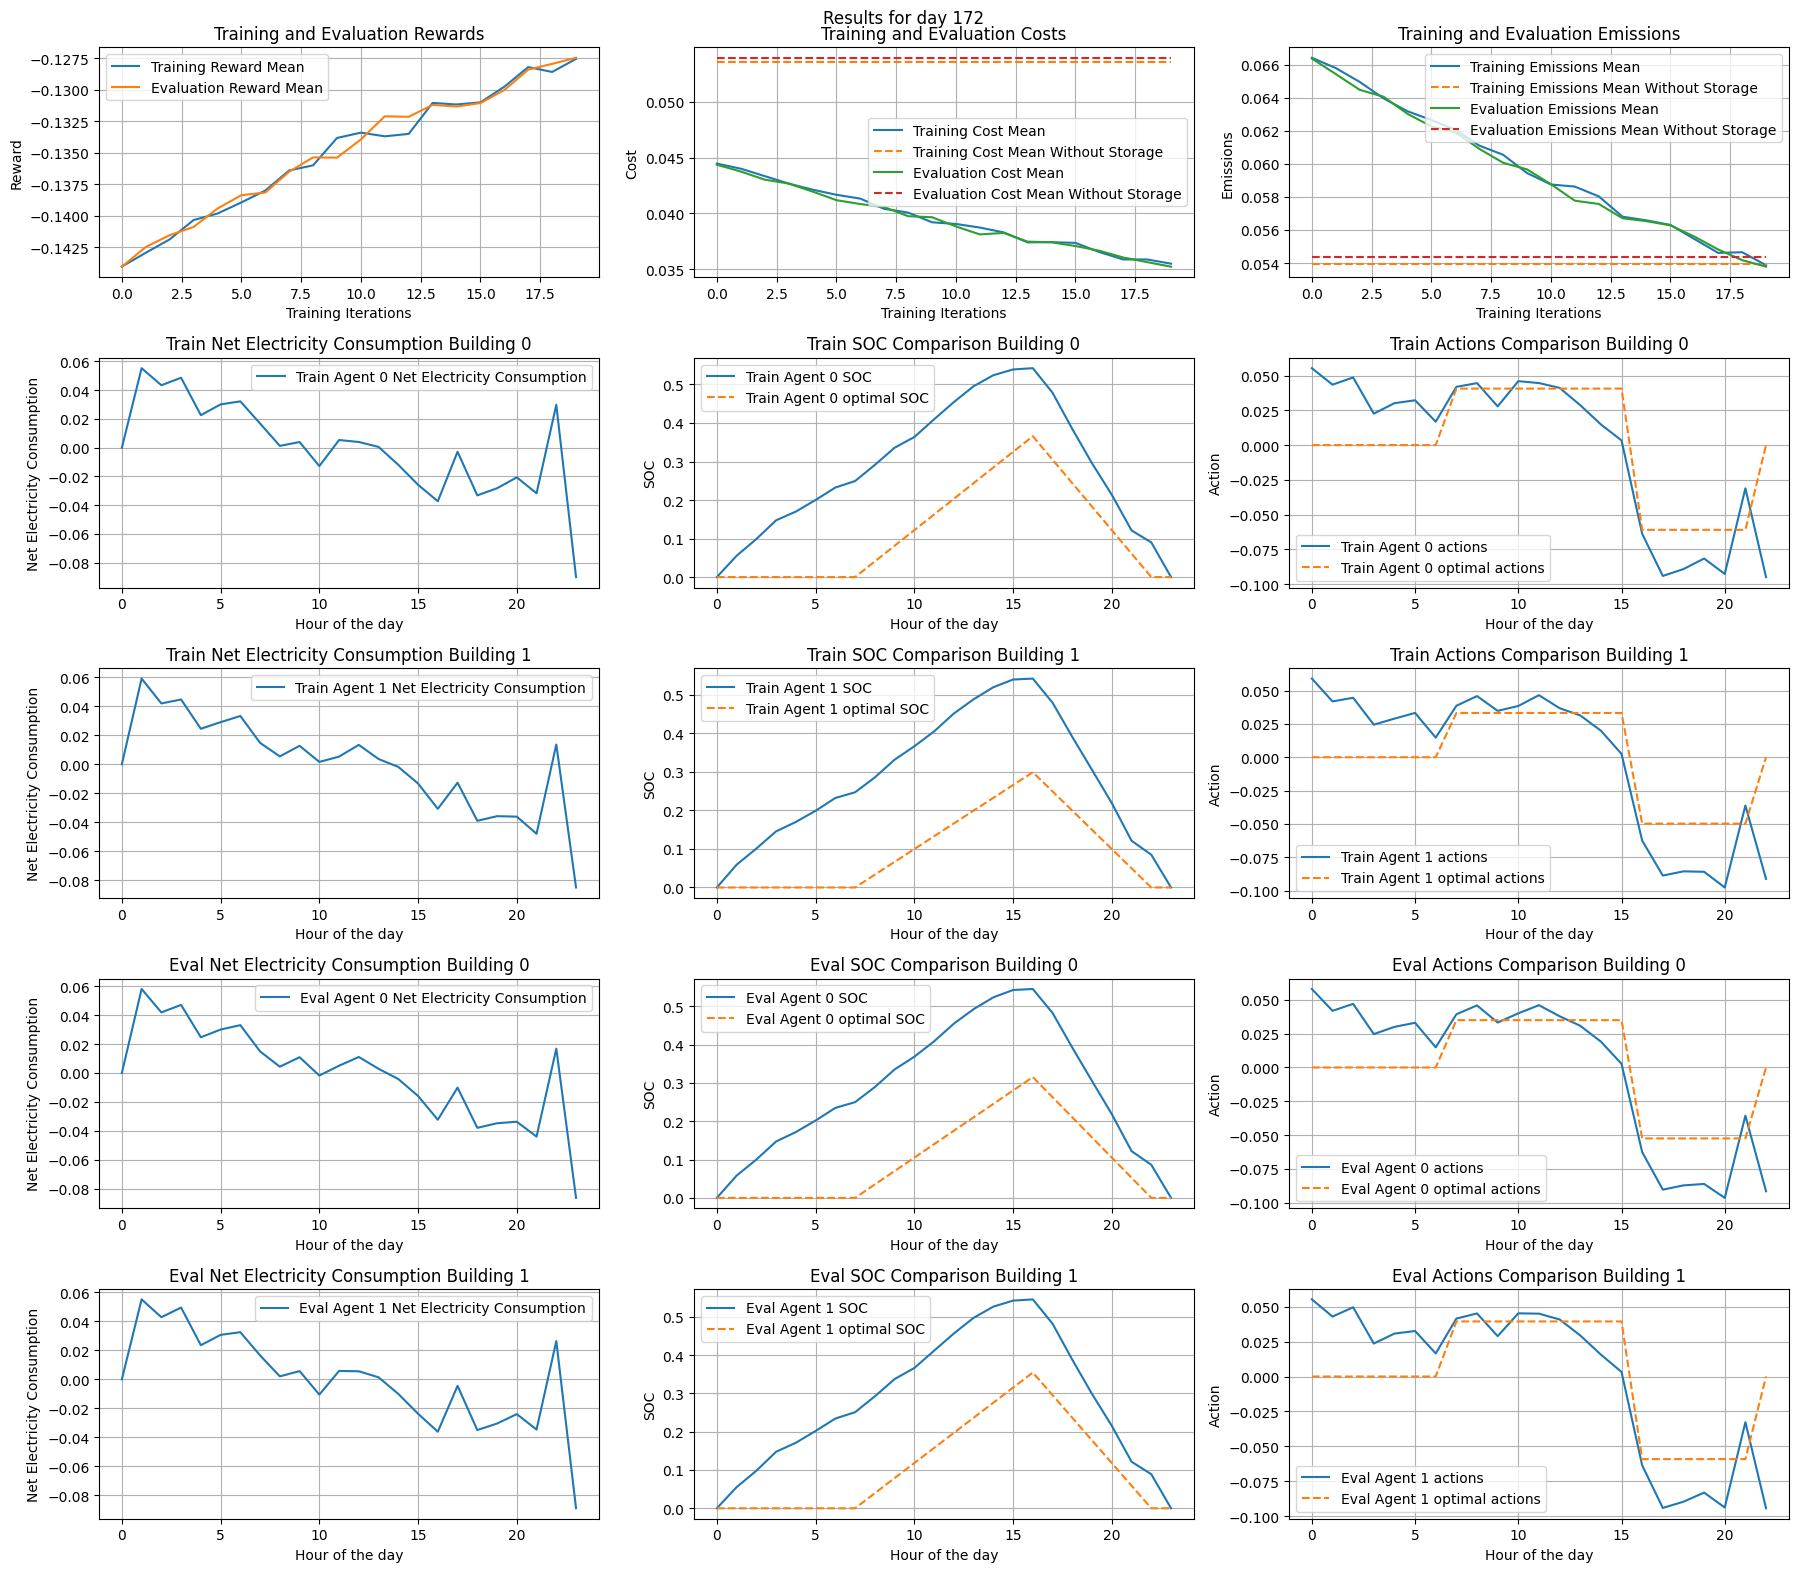

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [17]:
import copy

bu_policy = copy.deepcopy(policy)

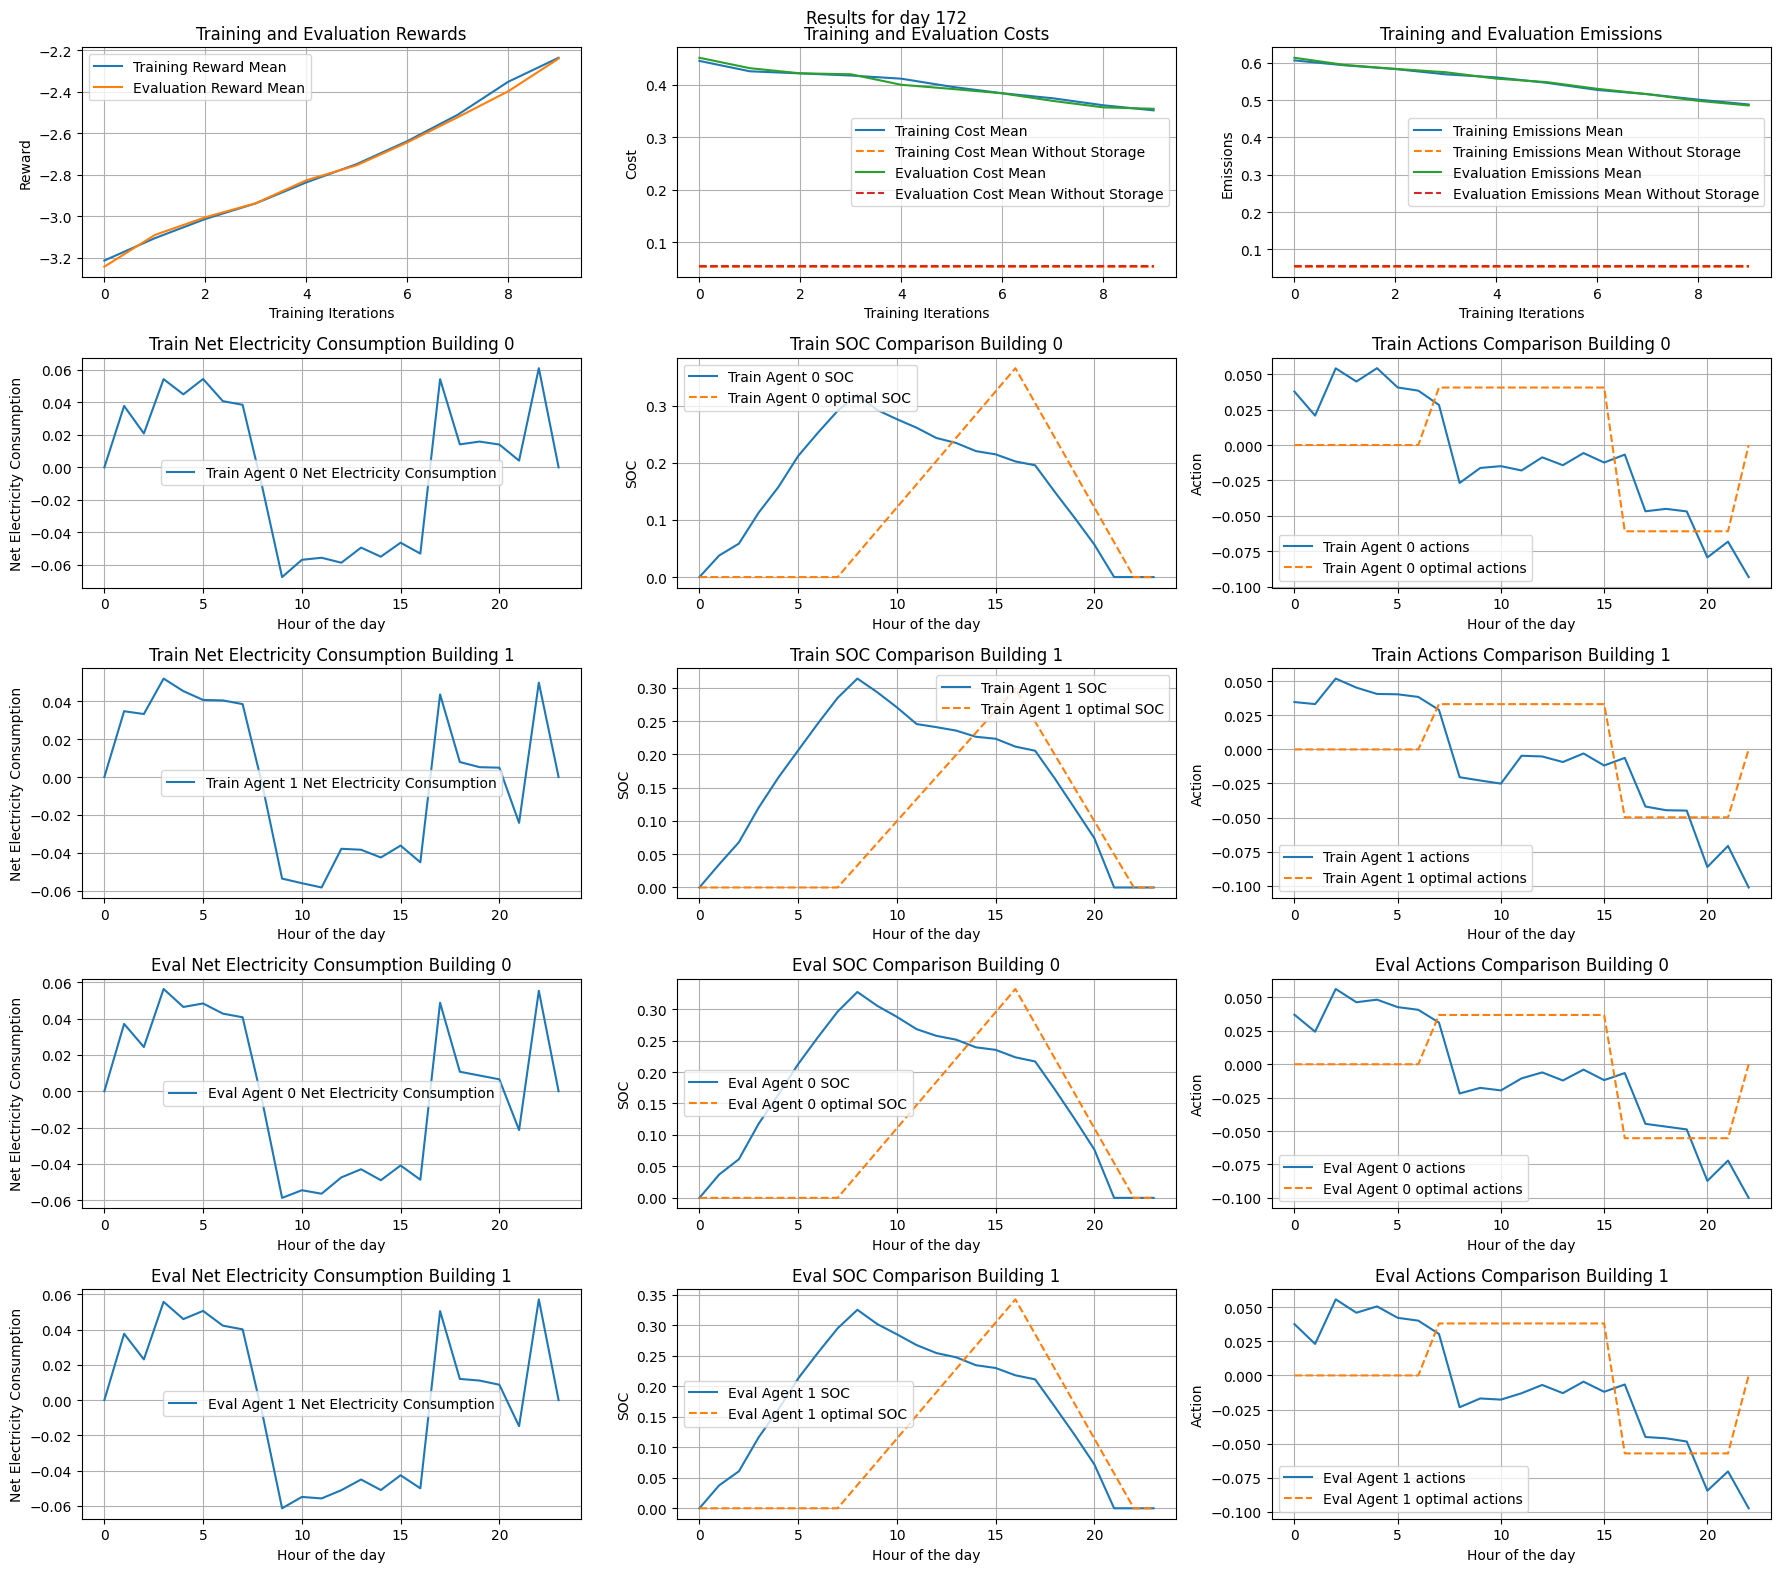

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

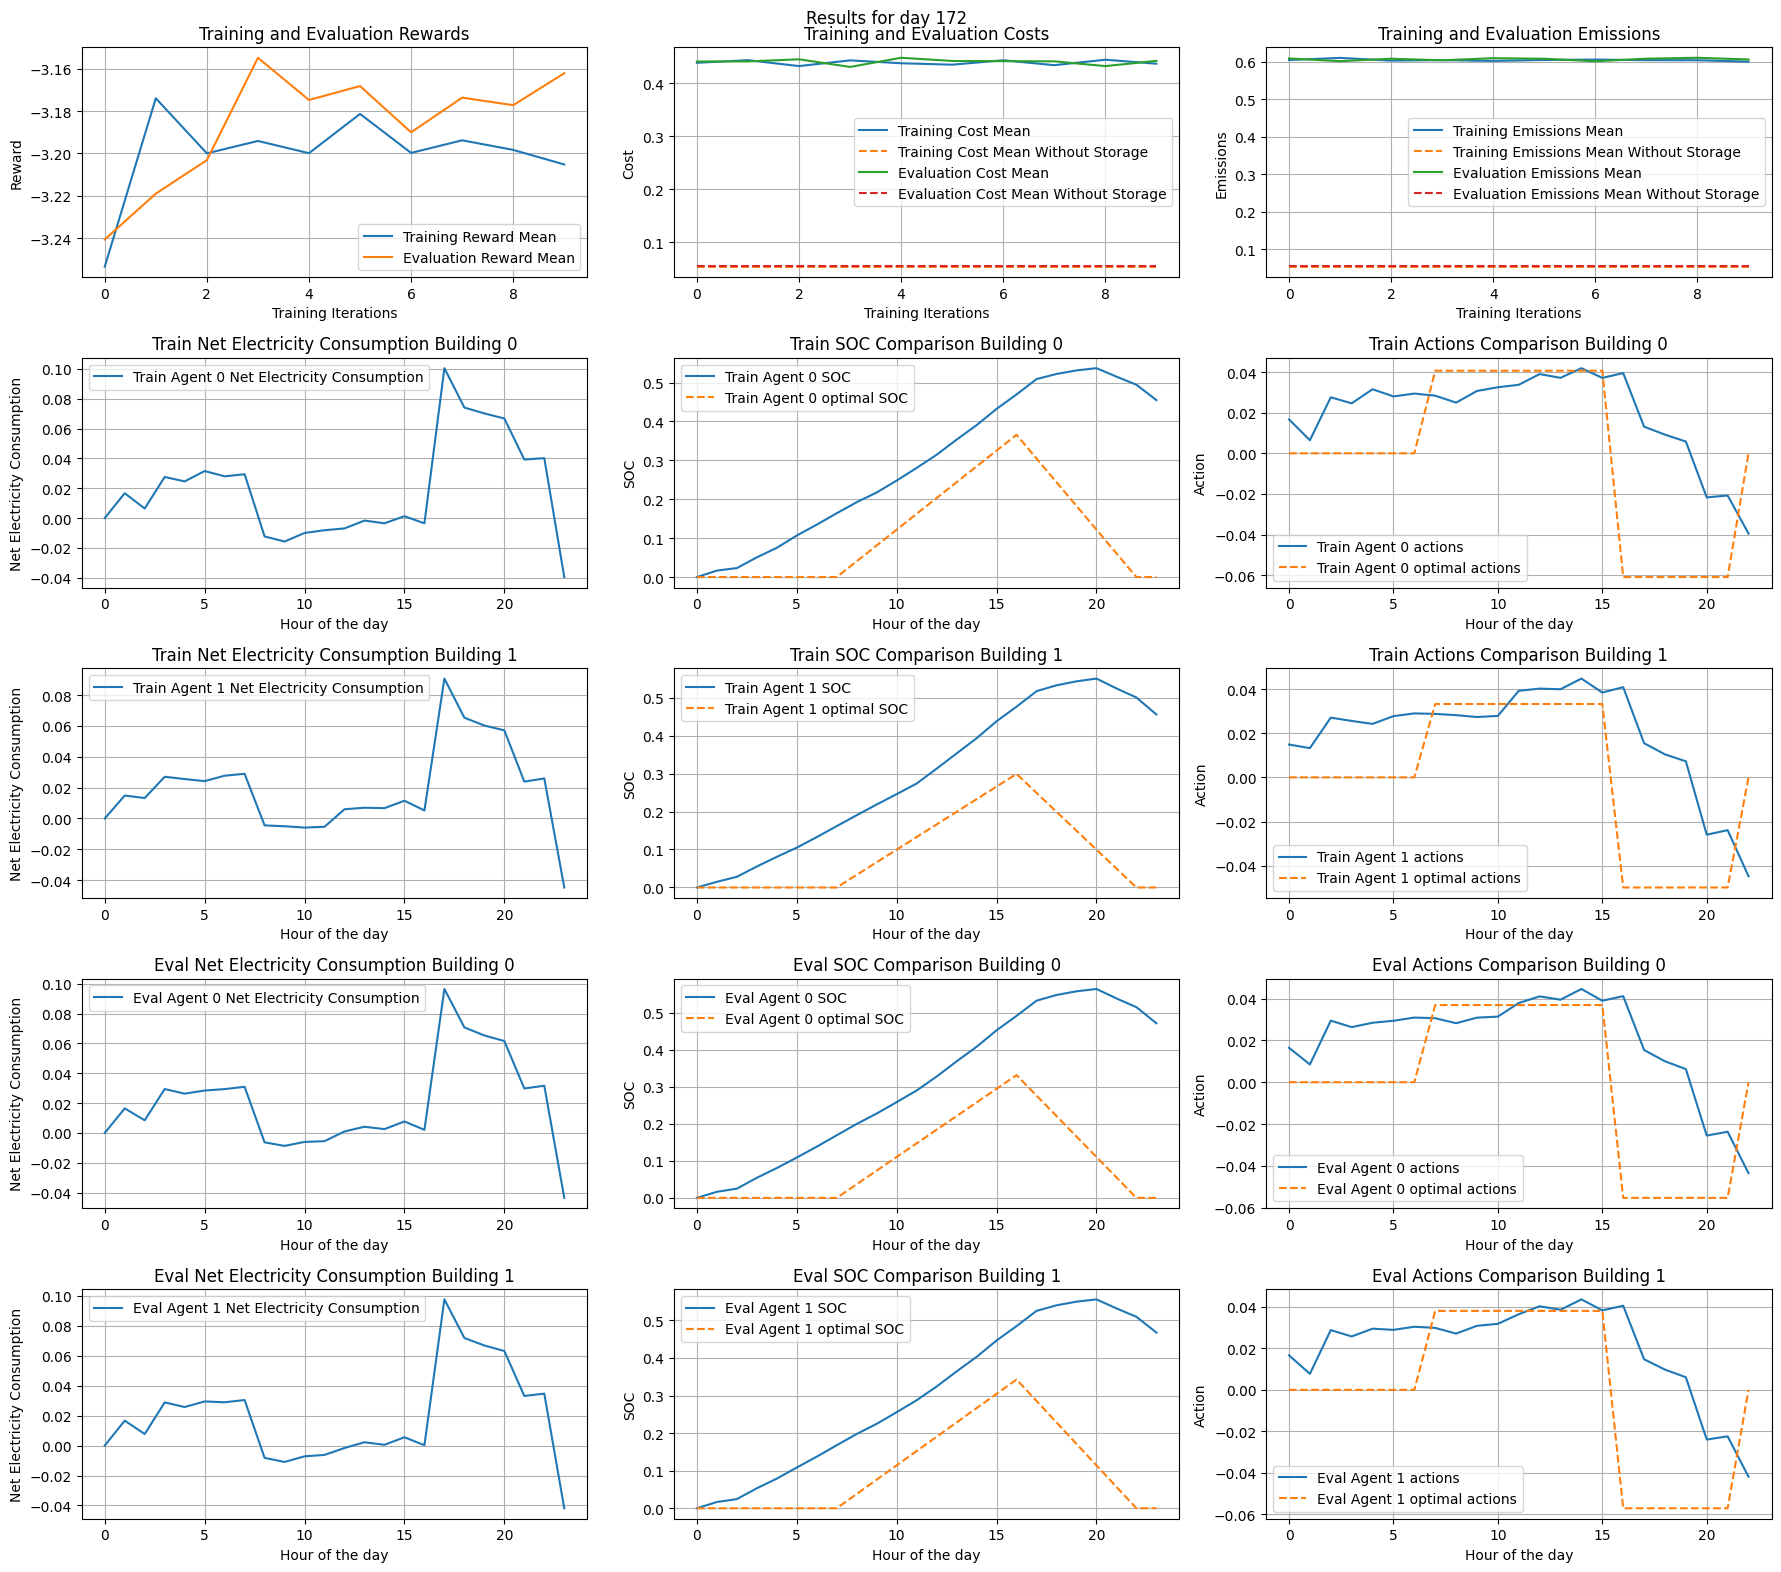

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

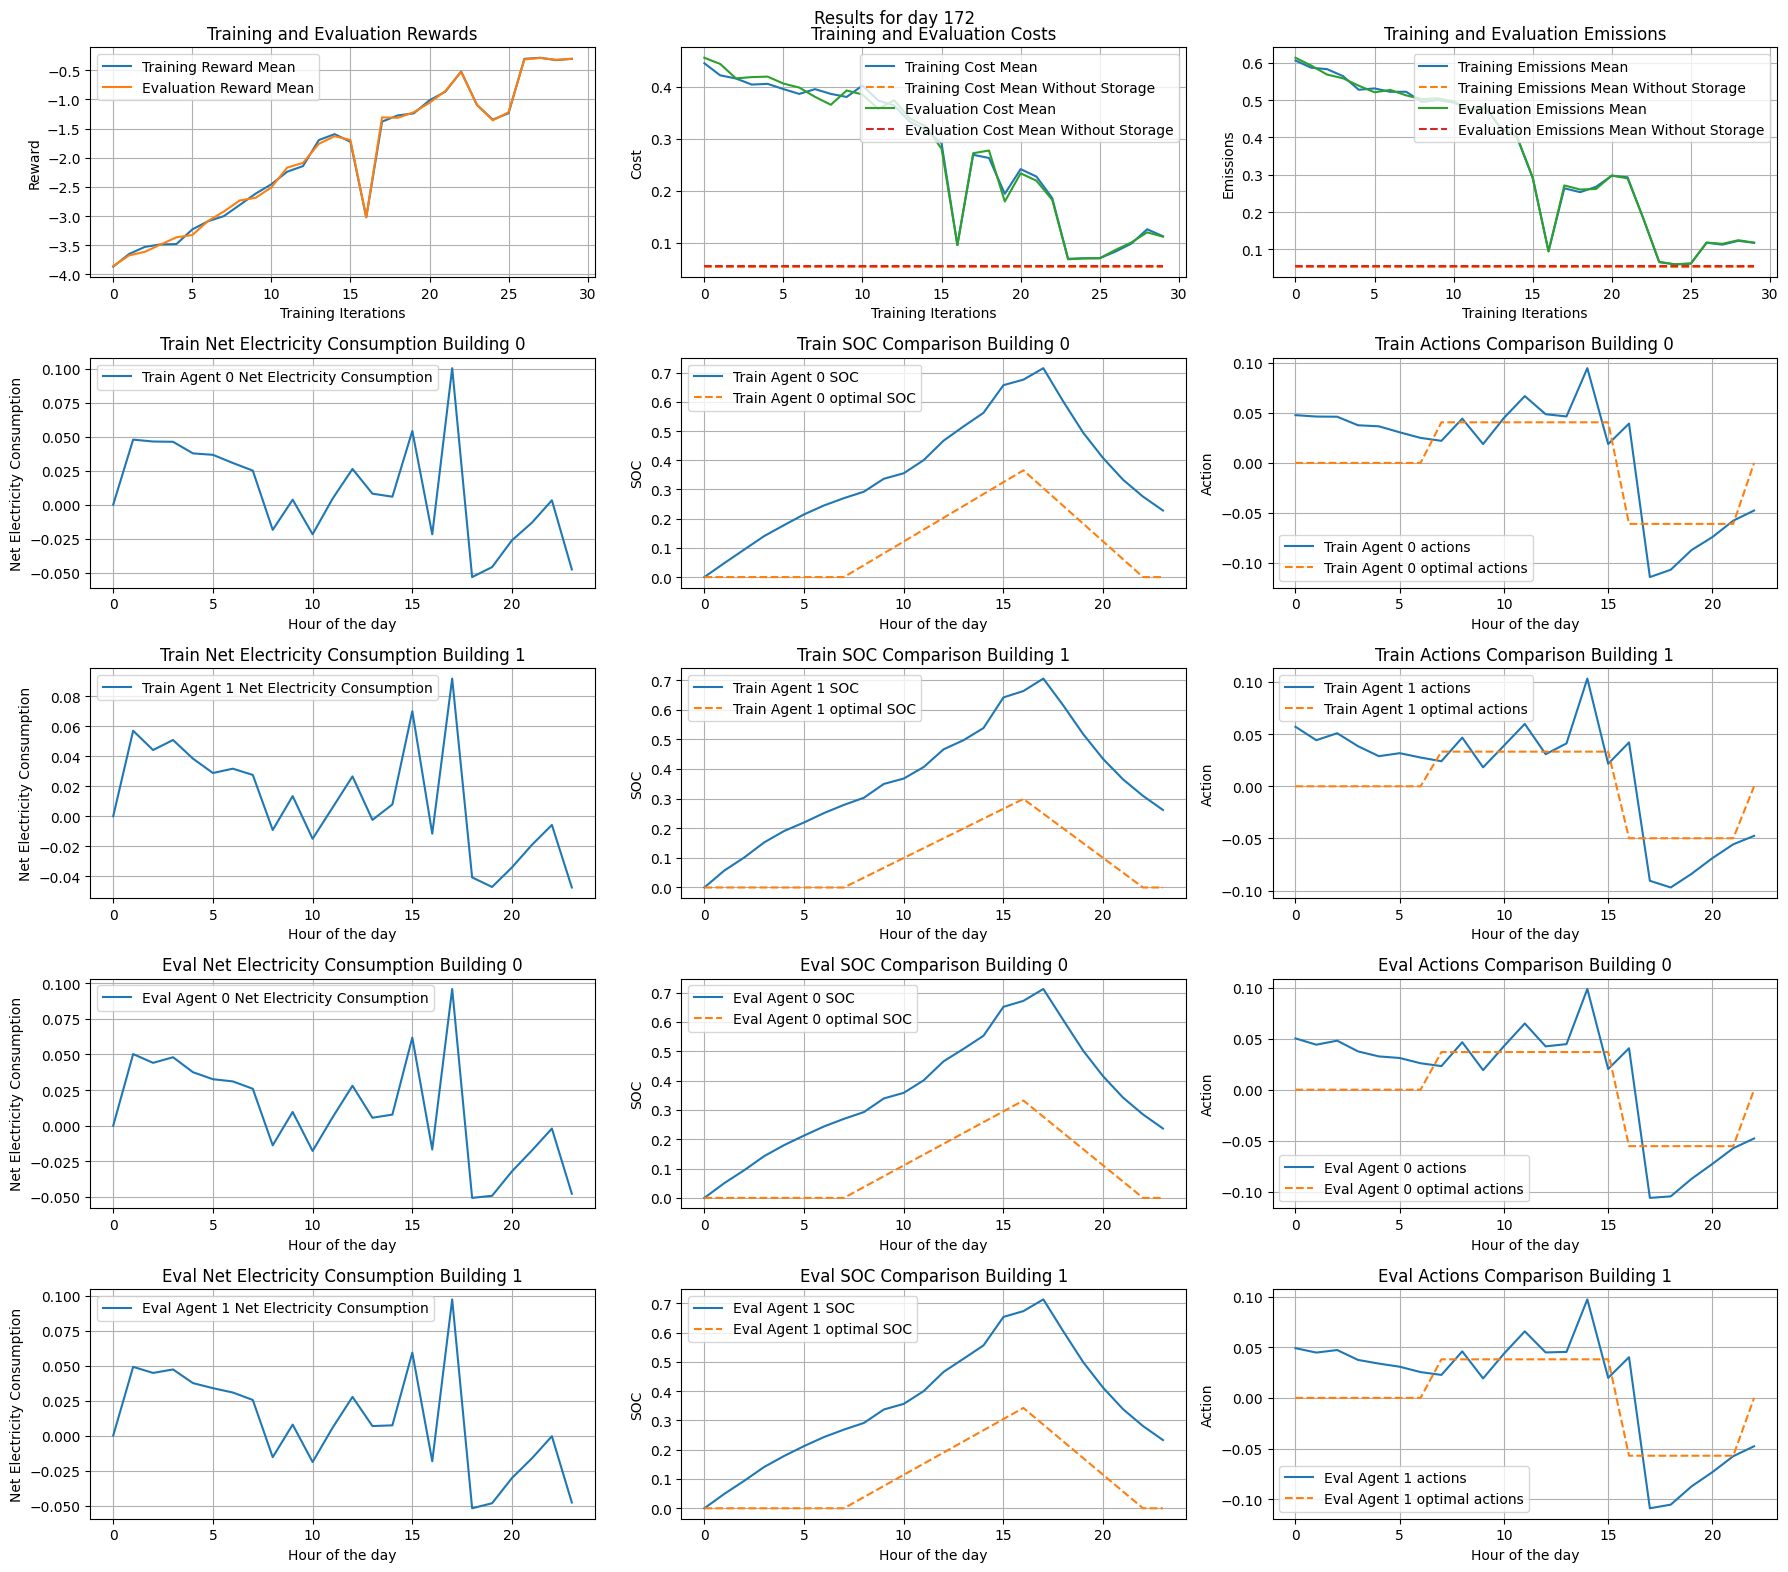

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
)